<a href="https://colab.research.google.com/github/Macleyn/ML/blob/main/%D0%A6%D0%9A_%D0%9C%D0%A4%D0%A2%D0%98/RF1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [106]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, plot_tree
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, accuracy_score, root_mean_squared_error
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier

In [107]:
data = pd.read_csv('music_prepared.csv')
data.head()

,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,77,230613,False,0.509,0.448,4,-7.552,0,0.0357,0.00713,0.013700,0.2440,0.221,156.909,3,0.0
1,79,208760,False,0.636,0.676,2,-3.442,1,0.0263,0.08070,0.000000,0.0831,0.273,113.980,4,0.0
2,76,180690,False,0.573,0.539,2,-6.091,0,0.0322,0.01620,0.000012,0.1050,0.390,75.012,4,0.0
3,84,232106,False,0.743,0.446,4,-7.807,0,0.0683,0.00390,0.118000,0.3370,0.278,123.596,4,0.0
4,76,225026,False,0.572,0.214,7,-15.625,1,0.0293,0.64900,0.129000,0.1250,0.485,95.542,4,0.0


In [108]:
X = data.drop(['popularity'], axis=1)
y = data['popularity']

In [109]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   popularity        5000 non-null   int64  
 1   duration_ms       5000 non-null   int64  
 2   explicit          5000 non-null   bool   
 3   danceability      5000 non-null   float64
 4   energy            5000 non-null   float64
 5   key               5000 non-null   int64  
 6   loudness          5000 non-null   float64
 7   mode              5000 non-null   int64  
 8   speechiness       5000 non-null   float64
 9   acousticness      5000 non-null   float64
 10  instrumentalness  5000 non-null   float64
 11  liveness          5000 non-null   float64
 12  valence           5000 non-null   float64
 13  tempo             5000 non-null   float64
 14  time_signature    5000 non-null   int64  
 15  track_genre       5000 non-null   float64
dtypes: bool(1), float64(10), int64(5)
memory u

In [110]:
X['explicit'] = X['explicit'].astype(int)
X.head()

,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,230613,0,0.509,0.448,4,-7.552,0,0.0357,0.00713,0.013700,0.2440,0.221,156.909,3,0.0
1,208760,0,0.636,0.676,2,-3.442,1,0.0263,0.08070,0.000000,0.0831,0.273,113.980,4,0.0
2,180690,0,0.573,0.539,2,-6.091,0,0.0322,0.01620,0.000012,0.1050,0.390,75.012,4,0.0
3,232106,0,0.743,0.446,4,-7.807,0,0.0683,0.00390,0.118000,0.3370,0.278,123.596,4,0.0
4,225026,0,0.572,0.214,7,-15.625,1,0.0293,0.64900,0.129000,0.1250,0.485,95.542,4,0.0


In [111]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
X_train.shape

(4000, 15)

In [112]:
tree = DecisionTreeRegressor(random_state=1)
tree.fit(X_train, y_train)
forest = RandomForestRegressor(random_state=1)
forest.fit(X_train, y_train)
y_pred_tree = tree.predict(X_test)
rmse_tree = root_mean_squared_error(y_test, y_pred_tree)
y_pred_forest = forest.predict(X_test)
rmse_forest = root_mean_squared_error(y_test, y_pred_forest)
rmse_tree - rmse_forest

7.2137794461624765

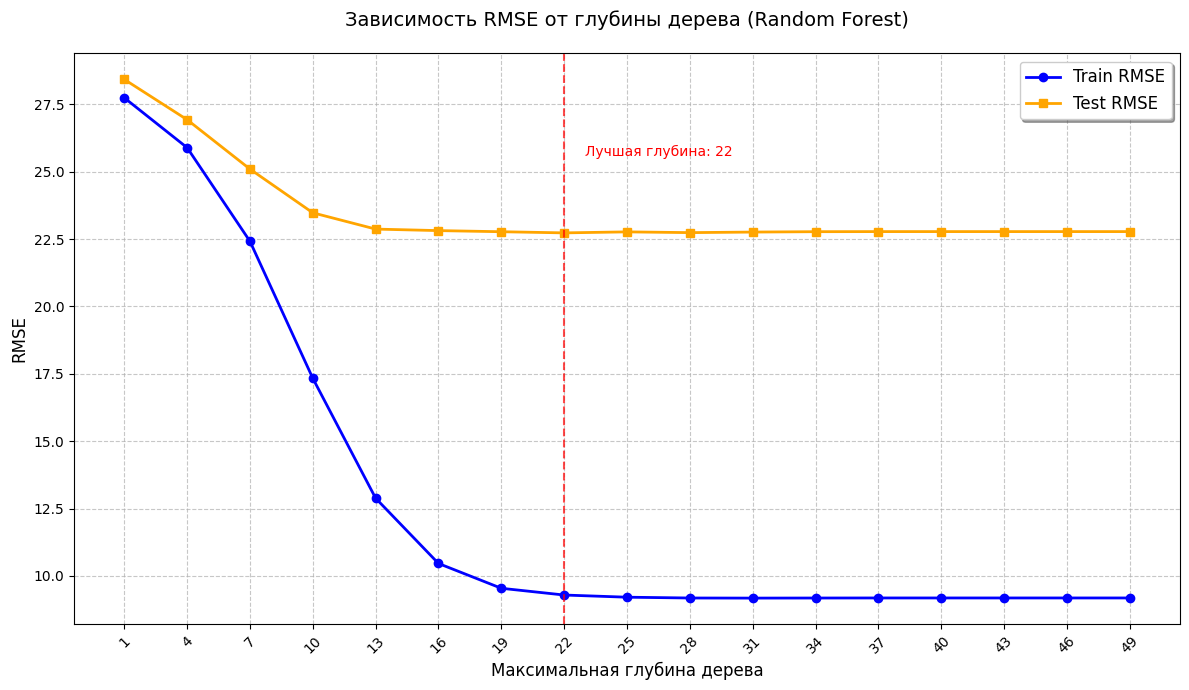

In [113]:
metrics_train = []
metrics_test = []
depth = range(1, 50, 3)

for max_depth in depth:
    forest = RandomForestRegressor(max_depth=max_depth, random_state=1)
    forest.fit(X_train, y_train)
    y_pred = forest.predict(X_test)
    rmse_test = root_mean_squared_error(y_test, y_pred)
    metrics_test.append(rmse_test)
    rmse_train = root_mean_squared_error(y_train, forest.predict(X_train))
    metrics_train.append(rmse_train)

plt.figure(figsize=(12, 7))
plt.grid(True, linestyle='--', alpha=0.7)
plt.plot(depth, metrics_train, label='Train RMSE', marker='o', linewidth=2, color='blue')
plt.plot(depth, metrics_test, label='Test RMSE', marker='s', linewidth=2, color='orange')

plt.title('Зависимость RMSE от глубины дерева (Random Forest)', fontsize=14, pad=20)
plt.xlabel('Максимальная глубина дерева', fontsize=12)
plt.ylabel('RMSE', fontsize=12)
plt.xticks(depth, rotation=45)
plt.legend(fontsize=12, framealpha=1, shadow=True)

# Добавим вертикальную линию в точке наилучшего результата
best_depth_idx = np.argmin(metrics_test)
best_depth = list(depth)[best_depth_idx]
plt.axvline(x=best_depth, color='red', linestyle='--', alpha=0.7)
plt.text(best_depth+1, max(max(metrics_train), max(metrics_test))*0.9,
         f'Лучшая глубина: {best_depth}', color='red')

plt.tight_layout()
plt.show()

In [117]:
y_train_binary = (y_train > 50).astype(int)
y_test_binary = (y_test > 50).astype(int)

In [118]:
dt = DecisionTreeClassifier(max_depth=17, random_state=1)
dt.fit(X_train, y_train_binary)

# Accuracy для дерева решений
dt_train_acc = accuracy_score(y_train_binary, dt.predict(X_train))
dt_test_acc = accuracy_score(y_test_binary, dt.predict(X_test))

# 2. Обучаем случайный лес (базовые параметры)
rf = RandomForestClassifier(random_state=1)
rf.fit(X_train, y_train_binary)

# Accuracy для случайного леса
rf_train_acc = accuracy_score(y_train_binary, rf.predict(X_train))
rf_test_acc = accuracy_score(y_test_binary, rf.predict(X_test))

# Разница в accuracy на тестовой выборке
difference = round(rf_test_acc - dt_test_acc, 2)

difference

0.08

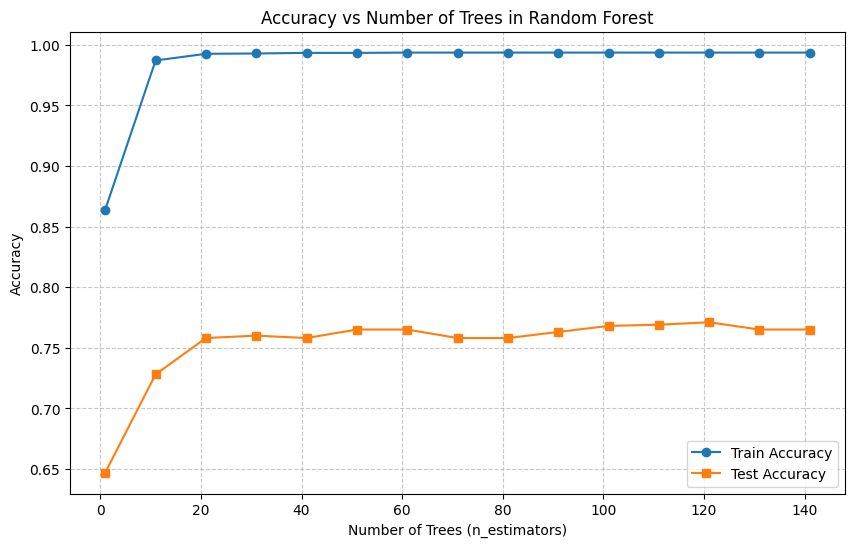

In [120]:
metrics_train = []
metrics_test = []

n_estimators_range = range(1, 151, 10)

for n_estimators in n_estimators_range:
  forest = RandomForestClassifier(n_estimators = n_estimators, random_state=1)
  forest.fit(X_train, y_train_binary)
  y_pred = forest.predict(X_test)
  acc_test = accuracy_score(y_test_binary, y_pred)
  metrics_test.append(acc_test)
  acc_train = accuracy_score(y_train_binary, forest.predict(X_train))
  metrics_train.append(acc_train)

plt.figure(figsize=(10, 6))
plt.plot(n_estimators_range, metrics_train, label='Train Accuracy', marker='o')
plt.plot(n_estimators_range, metrics_test, label='Test Accuracy', marker='s')
plt.xlabel('Number of Trees (n_estimators)')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Number of Trees in Random Forest')
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
plt.show()

In [172]:
np.random.seed(42)

def get_bootstrap(data, labels, n=100, max_samples=1.0):
    if isinstance(data, pd.DataFrame):
        data = data.copy().values

    if isinstance(labels, (pd.DataFrame, pd.Series)):
        labels = labels.copy().values

    n_samples = int(max_samples * data.shape[0])
    bootstrap = []

    for _ in range(n):
        sample_index = np.random.randint(low = 0, high = data.shape[0], size=n_samples)
        b_data = data[sample_index]
        b_labels = labels[sample_index]

        bootstrap.append((b_data, b_labels))

    return bootstrap

bootstrap_samples = get_bootstrap(X_train, y_train_binary, n=3, max_samples=0.01)
first_sample_labels = bootstrap_samples[0][1]
sum(first_sample_labels == 1)

np.int64(12)

In [173]:
np.random.seed(42)  # для фиксации случайности


def get_subsample(features, max_features=1.0):
    if not isinstance(features, np.ndarray):
        features = np.array(features.copy())  # перевод признаков в numpy array

    len_features = max(1, int(len(features) * max_features))  # подсчет кол-ва признаков в подвыборках
    sample_indexes = list(range(len(features)))  # получение списка индексов признаков

    subsample = np.random.choice(  # взятие случайных индексов признаков
        sample_indexes,
        size=len_features,  # в кол-ве len_features
        replace=False  # без повторений
    )

    return features[subsample]  # на список выходе признаки

sample_features = X_train.columns
get_subsample(sample_features, max_features=0.1)

array(['instrumentalness'], dtype=object)

In [174]:
np.random.seed(42)  # для фиксации случайности

forest = []
bootstrap = get_bootstrap(X_train, y_train_binary, max_samples = 0.5)  # получаем подвыборки

for b_data, b_labels in bootstrap:
    b_data = pd.DataFrame(b_data, columns=X_train.columns)
    features = get_subsample(X_train.columns, max_features=0.5) # получаем признаки

    dt = DecisionTreeClassifier(random_state=1).fit(b_data[features], b_labels)
    forest.append(dt)

In [175]:
forest[0].get_depth()

23

In [180]:
# добавим предсказания всех деревьев в список
predictions = []
for tree in forest:
    predictions.append(tree.predict(X_test[tree.feature_names_in_]))

# сформируем список с предсказаниями для каждого объекта
predictions_per_object = list(zip(*predictions))


# выберем в качестве итогового предсказания для каждого объекта тот класс,
# за который проголосовало большинство деревьев
voted_predictions = []
for obj in predictions_per_object:
    voted_predictions.append(max(set(obj), key=obj.count))

len(voted_predictions)

1000

In [183]:
accuracy_score(voted_predictions, y_test_binary)

0.756